# Importing necessary libraries

In [1]:
# PoseGuard: CNN Model for Driver Pose Detection

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Constants
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 25
NUM_CLASSES = 8
MODEL_PATH = 'poseguard_model.h5'

In [3]:
# Dataset Loader
def load_dataset(image_dir, label_dir):
    images, labels = [], []
    label_files = {file.split('.')[0]: file for file in os.listdir(label_dir)}
    
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, label_files.get(img_file.split('.')[0], ''))

        if os.path.exists(label_path):
            img = cv2.imread(img_path)
            img = cv2.resize(img, IMAGE_SIZE)
            img = img / 255.0
            
            with open(label_path, 'r') as file:
                label = int(file.readline().strip().split()[0])

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

In [7]:
# Load Data
train_images, train_labels = load_dataset("dataset/train/images", "dataset/train/labels")
val_images, val_labels = load_dataset("dataset/valid/images", "dataset/valid/labels")

In [8]:
# One-hot encode labels
y_train = to_categorical(train_labels, NUM_CLASSES)
y_val = to_categorical(val_labels, NUM_CLASSES)

In [9]:
# Train/test split
X_train, X_test, y_train_split, y_test_split = train_test_split(train_images, y_train, test_size=0.2, random_state=42)

In [10]:
# Define CNN Model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# Load or Create Model
if os.path.exists(MODEL_PATH):
    print("Loading existing model...")
    model = load_model(MODEL_PATH)
else:
    print("Creating and training new model...")
    model = create_model()
    history = model.fit(X_train, y_train_split, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test_split))
    model.save(MODEL_PATH)
    print("Model saved.")

Creating and training new model...


c:\Users\adity\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.1126 - loss: 2.1459 - val_accuracy: 0.1693 - val_loss: 2.0841
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.1597 - loss: 2.0781 - val_accuracy: 0.1746 - val_loss: 2.0757
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.1750 - loss: 2.0700 - val_accuracy: 0.1111 - val_loss: 2.0760
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.1752 - loss: 2.0622 - val_accuracy: 0.1323 - val_loss: 2.0618
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.2262 - loss: 2.0023 - val_accuracy: 0.2487 - val_loss: 1.9860
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.3453 - loss: 1.7669 - val_accuracy: 0.4021 - val_loss: 1.6576
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4855 - loss: 1.4018 - val_accuracy: 0.4868 - val_loss: 1.4877
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6110 - loss: 1.0830 - val_accuracy: 0.6032 - val_loss:

Model saved.


In [12]:
# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_images, y_val)
print(f"Validation Accuracy: {val_acc:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step - accuracy: 0.4188 - loss: 3.8863
Validation Accuracy: 0.43


In [13]:
# Generate Predictions
predictions = model.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_val, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 560ms/step


In [14]:
# Report
print(classification_report(true_classes, predicted_classes))
print(confusion_matrix(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.43      0.60      0.50         5
           2       0.00      0.00      0.00         2
           3       0.75      0.60      0.67         5
           4       0.25      0.67      0.36         3
           5       1.00      0.20      0.33         5
           6       0.67      0.40      0.50         5
           7       0.50      0.40      0.44        10

    accuracy                           0.42        40
   macro avg       0.50      0.41      0.40        40
weighted avg       0.55      0.42      0.44        40

[[2 1 0 0 0 0 0 2]
 [0 3 0 0 2 0 0 0]
 [0 0 0 0 1 0 0 1]
 [0 1 0 3 1 0 0 0]
 [0 0 1 0 2 0 0 0]
 [0 1 1 0 1 1 1 0]
 [0 0 1 0 1 0 2 1]
 [3 1 1 1 0 0 0 4]]


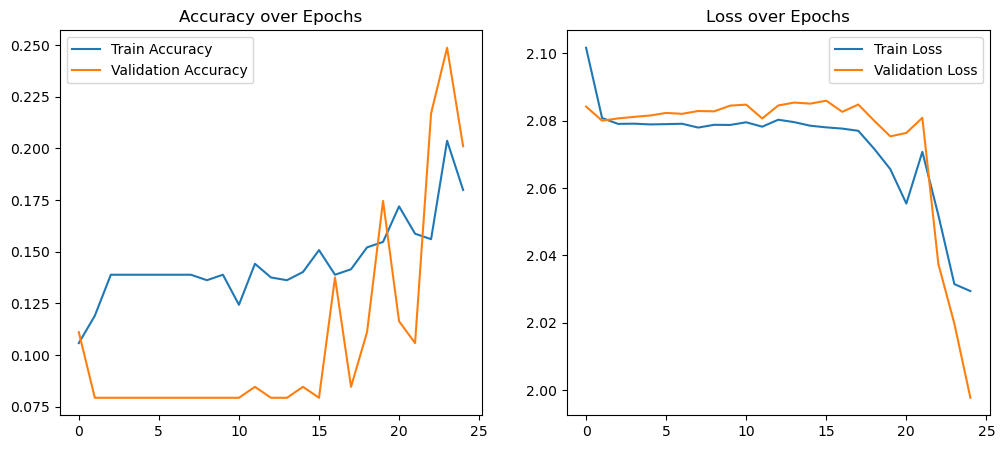

In [29]:
# Visualization of accuracy & loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

In [16]:
# Alert system
def generate_alert(predicted_class):
    alert_classes = [1, 2, 3, 4, 5, 6, 7]  # Unwanted poses
    if predicted_class in alert_classes:
        print("⚠️ ALERT: Unwanted Pose Detected! ⚠️")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
⚠️ ALERT: Unwanted Pose Detected! ⚠️


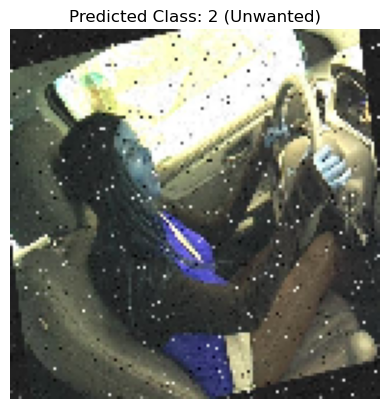

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
⚠️ ALERT: Unwanted Pose Detected! ⚠️


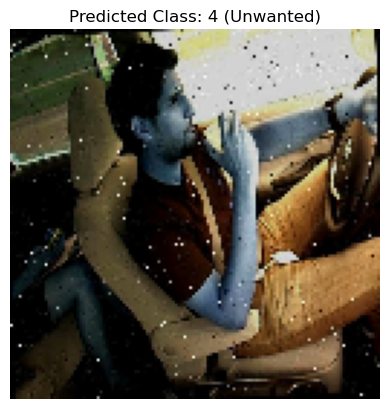

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
⚠️ ALERT: Unwanted Pose Detected! ⚠️


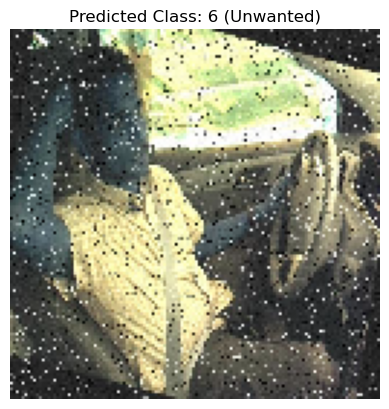

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
⚠️ ALERT: Unwanted Pose Detected! ⚠️


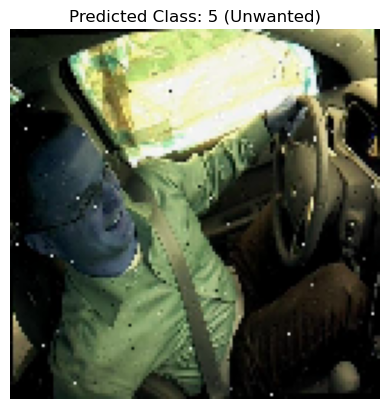

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
⚠️ ALERT: Unwanted Pose Detected! ⚠️


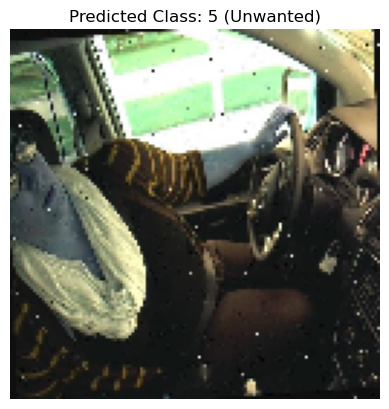

In [17]:
# Testing with sample images from X_test
for i in range(5):
    sample_img = X_test[i]
    
    # Reshape and normalize (if not already normalized)
    img_input = sample_img.reshape(1, 128, 128, 3)
    
    # Predict
    prediction = model.predict(img_input)
    pred_class = np.argmax(prediction)
    
    # Call alert system (optional)
    generate_alert(pred_class)  # Make sure this function is defined
    
    # Display image with prediction
    plt.imshow(sample_img)
    plt.title(f"Predicted Class: {pred_class} ({'Safe' if pred_class == 0 else 'Unwanted'})")
    plt.axis('off')
    plt.show()
